# Recommendation System & Market Basket Analysis

The objective of this project is to carry out a Recommendation System and an analysis of Market Basket to an Amazon.com database through Machine Learning.

# Content

* [1. Introduction](#1)
* [2. Business Understanding](#2)
* [3. Data Understanding](#3)
    * [3.1 Load Libraries](#3.1)    
    * [3.2. Load Dataset](#3.2)
    * [3.3. Exploratory Data Analysis (EDA)](#3.3)
    * [3.4. Descriptive Statistics](#3.4)
    * [3.5. Data Visualization](#3.5)
* [4. Data Preparation](#4)
* [5. Modeling](#5)
* [7. Bibliography](#7)

<a id='1'></a>
# 1. Introduction

In the digital commerce era, recommendation systems have become an essential tool to enhance the customer experience and maximize the operational efficiency of businesses. This project focuses on implementing a recommendation system and a Market Basket analysis, using a database extracted from https://www.iguazio.com/blog/13-best-free-retail-datasets-for-machine-learning/.

The aim is twofold; on one hand, I seek to understand and predict user preferences and behaviors to offer personalized product suggestions; on the other, I want to uncover hidden patterns in consumer purchasing decisions through Market Basket analysis, which will allow us to identify which products tend to be purchased together.

To carry out this project, I will adopt the CRISP-DM methodology (Cross-Industry Standard Process for Data Mining), a standard six-phase process that guides from business understanding to the deployment of the data mining model. This approach will ensure a systematic and organized development that will cover business understanding, data understanding, data preparation, modeling, evaluation, and finally, the deployment of the recommendation system and Market Basket analysis.

<a id='2'></a>
# 2. Business Understanding

First of all, you have to understand that there are different types of recommendation engines, such as:

* Content-based filtering


* Collaborative-based filtering (two types):
    * User-based Collaborative Filtering
    * Item-based Collaborative Filtering


* Hybrid Systems


* ML Clustering


* Market Basket Analysis (association rule mining)

In this project, I will focus on Content-based filtering, Collaborative-based filtering and Market basket analysis. But before continuing I will make a brief comparison between Collaborative Filtering and Content-Based Filtering System and what is the purpose and benefits that both clients and companies have when creating a recommendation system.

Reference: Hands-On Recommendation Systems with Python, Rounak Banik, Packt Publishing Copyright © 2018 Packt Publishing

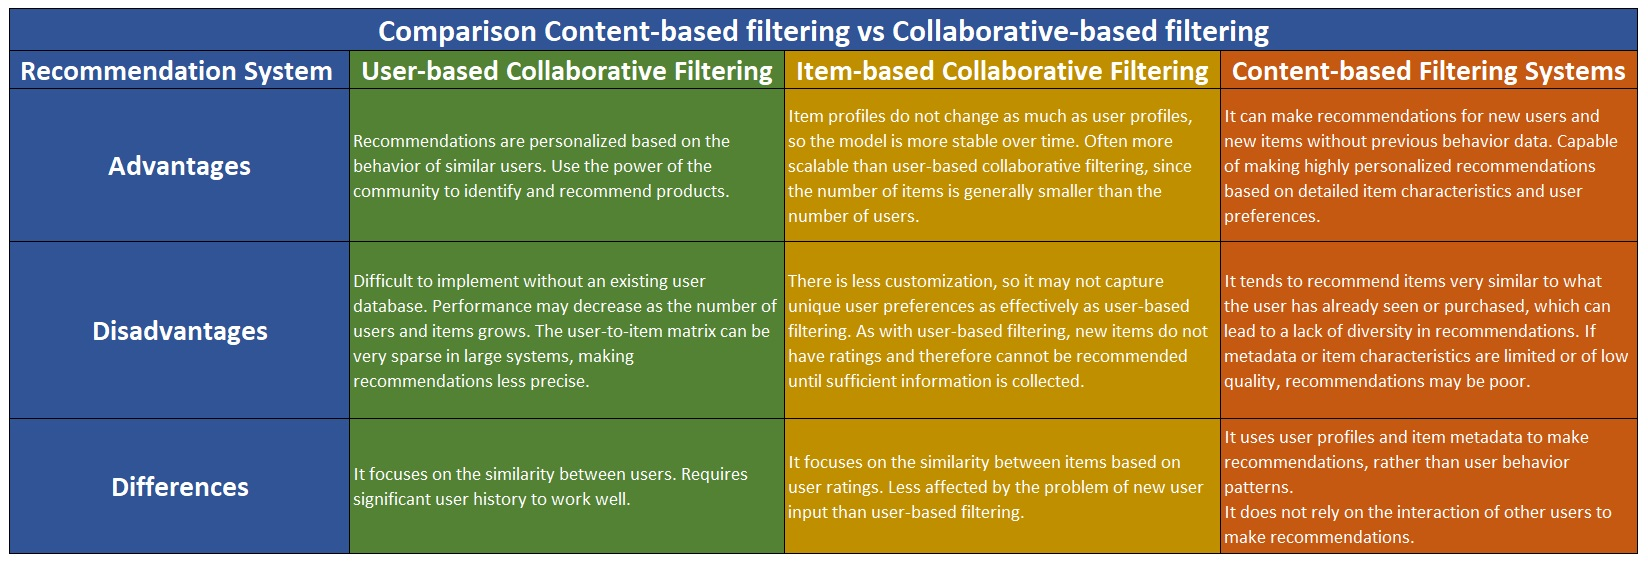

In [2]:
from IPython.display import Image
Image(filename =r'Comparison.jpg')

<a id='3'></a>
# 3. Data Understanding

<a id='3.1'></a>
## 3.1 Load Libraries

In [2]:
from IPython.display import Image
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<a id='3.2'></a>
## 3.2. Load Dataset

In [4]:
df_amazon = pd.read_csv("amazon_co-ecommerce_sample.csv")

<a id='3.3'></a>
## 3.3. Exploratory Data Analysis (EDA)

In [11]:
df_amazon.head()

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,348f344247b0c1a935b1223072ef9d8a,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,e12b92dbb8eaee78b22965d2a9bbbd9f,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,e33a9adeed5f36840ccc227db4682a36,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN


In [6]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [7]:
df_amazon.shape

(10000, 17)

<a id='3.4'></a>
## 3.4. Descriptive Statistics

In [8]:
df_amazon.describe(include='all')

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
count,10000,10000,9993,8565,7500,9982,9235.000000,9982,9310,8938,9349,9942,9349,6935,914,9979,6918
unique,10000,9964,2651,2625,89,194,NaN,19,255,8755,8514,9939,8514,6749,910,9901,6581
top,eac7efa5dbd3d667f26eb3d3ab504464,Polyhedral Dice,LEGO,£9.99,2 new,1,NaN,5.0 out of 5 stars,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,http://www.amazon.co.uk/Scalextric | http://ww...,"Welcome to k2, we offer combined items postage...",Technical Details Manufacturer recommended age...,"Welcome to k2, we offer combined items postage...",http://www.amazon.co.uk/Scalextric | http://ww...,Is it 12 days or 24? // 24,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,"{""seller""=>{""Seller_name_1""=>""k2-accessories"",..."
freq,1,3,171,189,1337,4315,NaN,5140,880,60,113,2,113,38,2,5,27
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.834976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.517268,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_amazon.isnull().sum()

uniq_id                                           0
product_name                                      0
manufacturer                                      7
price                                          1435
number_available_in_stock                      2500
number_of_reviews                                18
number_of_answered_questions                    765
average_review_rating                            18
amazon_category_and_sub_category                690
customers_who_bought_this_item_also_bought     1062
description                                     651
product_information                              58
product_description                             651
items_customers_buy_after_viewing_this_item    3065
customer_questions_and_answers                 9086
customer_reviews                                 21
sellers                                        3082
dtype: int64

<a id='3.5'></a>
## 3.5. Data Visualization

<a id='4'></a>
# 4. Data Preparation

<a id='5'></a>
# 5. Modeling

<a id='7'></a>
# 7. Bibliography